## **DataFrames**

In [183]:
import pandas as pd
import numpy as np

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.

data can be many different things:
* Dict of 1D ndarrays, lists, dicts, or Series
* 2-D numpy.ndarray
* Structured or record ndarray
* A Series
* Another DataFrame

## From dict of Series or dicts

In [184]:
d = {'one' : pd.Series([1., 2., 3., 5.], index=['a', 'b', 'c', 'e']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
d

{'one': a    1.0
 b    2.0
 c    3.0
 e    5.0
 dtype: float64, 'two': a    1.0
 b    2.0
 c    3.0
 d    4.0
 dtype: float64}

In [185]:
d['two']

a    1.0
b    2.0
c    3.0
d    4.0
dtype: float64

In [186]:
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0
e,5.0,NaN


In [187]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [188]:
pd.DataFrame(d['one'], index=['d', 'b', 'a'])

,0
d,NaN
b,2.0
a,1.0


In [189]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [190]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'one', 'three'])

,two,one,three
d,4.0,NaN,NaN
b,2.0,2.0,NaN
a,1.0,1.0,NaN


In [191]:
df.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [192]:
df.columns

Index(['one', 'two'], dtype='object')

## From dict of ndarrays / lists

In [193]:
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}
d

{'one': [1.0, 2.0, 3.0, 4.0], 'two': [4.0, 3.0, 2.0, 1.0]}

In [194]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [195]:
df = pd.DataFrame(d, index=['a', 'b', 'c', 'd'])
df

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [196]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

## From structured or record array

In [197]:
data = np.zeros((2,), dtype=[('A', 'i4'),('B', 'f4'),('C', 'a10')])
data

array([(0, 0., b''), (0, 0., b'')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [198]:
pd.DataFrame(data)

,A,B,C
0,0,0.0,b''
1,0,0.0,b''


In [199]:
data[:] = [(1,2.,'Hello'), (2,3.,"World")]

In [200]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [201]:
pd.DataFrame(data, index=['first', 'second'])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [202]:
pd.DataFrame(data, columns=['C', 'A', 'B'])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


In [203]:
pd.DataFrame(data, columns=['C', 'A', 'B'], index=['first','second'])

,C,A,B
first,b'Hello',1,2.0
second,b'World',2,3.0


In [204]:
pd.DataFrame(data, columns=['C', 'A', 'B'], index=['second','first'])

,C,A,B
second,b'Hello',1,2.0
first,b'World',2,3.0


## From a list of dicts

In [205]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [206]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [207]:
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [208]:
pd.DataFrame(data2, columns=['a', 'b'])

,a,b
0,1,2
1,5,10


## From a dict of tuples

In [209]:
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
   ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
   ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
   ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
   ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

## DataFrame.from_dict

In [210]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [211]:
foo_df = pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]))
foo_df.set_index(['A','B'])

,
A,B
1,4
2,5
3,6


In [212]:
bar_df = pd.DataFrame(foo_df)
bar_df

,A,B
0,1,4
1,2,5
2,3,6


**_If you pass orient='index', the keys will be the row labels_**

In [213]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]),
                       orient='index', columns=['one', 'two','three'])

,one,two,three
A,1,2,3
B,4,5,6


# Column selection, addition, deletion

In [274]:
series_dict = {'one' : pd.Series([1., 2., 3., 5.], index=['a', 'b', 'c', 'e']),
               'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(series_dict)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0
e,5.0,NaN


In [215]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
e    5.0
Name: one, dtype: float64

## Column addition

In [216]:
df['three'] = df['one'] * df['two']
df

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,4.0
c,3.0,3.0,9.0
d,NaN,4.0,NaN
e,5.0,NaN,NaN


In [217]:
df['flag'] = df['one'] > 2
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False
e,5.0,NaN,NaN,True


## Column deletion

In [218]:
del df['two']
df

,one,three,flag
a,1.0,1.0,False
b,2.0,4.0,False
c,3.0,9.0,True
d,NaN,NaN,False
e,5.0,NaN,True


In [219]:
three = df.pop('three')
three

a    1.0
b    4.0
c    9.0
d    NaN
e    NaN
Name: three, dtype: float64

In [220]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False
e,5.0,True


## Columns insertion

In [221]:
df['foo'] = 'bar'
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar
e,5.0,True,bar


In [222]:
df["one"][4:]

e    5.0
Name: one, dtype: float64

In [223]:
df['one_trunc'] = df["one"][4:]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,NaN
b,2.0,False,bar,NaN
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN
e,5.0,True,bar,5.0


In [224]:
df.insert(4, 'one_clone', df['one'])

In [225]:
df

,one,flag,foo,one_trunc,one_clone
a,1.0,False,bar,NaN,1.0
b,2.0,False,bar,NaN,2.0
c,3.0,True,bar,NaN,3.0
d,NaN,False,bar,NaN,NaN
e,5.0,True,bar,5.0,5.0


# Assigning New Columns in Method Chains

In [226]:
iris = pd.read_csv('data/iris.data')
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**_assign always returns a copy of the data, leaving the original DataFrame untouched_**

In [227]:
iris.assign(sepal_ratio = iris['SepalWidth'] / iris['SepalLength'])

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [228]:
iris.assign(sepal_ratio_lambda = lambda x: (x['SepalWidth'] /  x['SepalLength'])).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio_lambda
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [229]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [230]:
iris = iris.assign(SepalRatio = lambda x: x.SepalWidth / x.SepalLength)
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,SepalRatio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


In [231]:
iris = iris.assign(PetalRatio = lambda x: x.PetalWidth / x.PetalLength)
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,SepalRatio,PetalRatio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275,0.142857
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245,0.142857
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851,0.153846
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913,0.133333
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000,0.142857


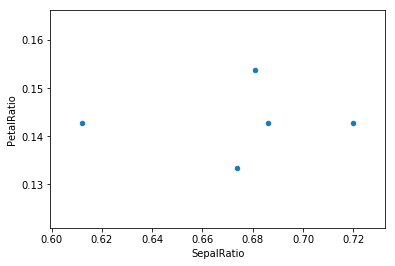

In [232]:
iris.query('SepalLength > 1').plot(kind='scatter', x='SepalRatio', y='PetalRatio')

# Indexing / Selection

In [287]:
series_dict = {'one' : pd.Series([1., 2., 3., 5.], index=['a', 'b', 'c', 'e']),
               'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd']),
               'three' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
sdf = pd.DataFrame(series_dict)
sdf

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,2.0
c,3.0,3.0,3.0
d,NaN,4.0,4.0
e,5.0,NaN,NaN


## **Select index**

In [276]:
sdf.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

## **Select column**

In [277]:
sdf.one

a    1.0
b    2.0
c    3.0
d    NaN
e    5.0
Name: one, dtype: float64

In [278]:
sdf['one']

a    1.0
b    2.0
c    3.0
d    NaN
e    5.0
Name: one, dtype: float64

In [289]:
sdf[['one','two']]

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0
e,5.0,NaN


## **Select row by label**

In [280]:
sdf.loc['a']

one    1.0
two    1.0
Name: a, dtype: float64

## **Select row by integer location**

In [281]:
sdf.iloc[0]

one    1.0
two    1.0
Name: a, dtype: float64

## **Select row and columns**

In [288]:
sdf.loc[['a','b'],['one','three']]

,one,three
a,1.0,1.0
b,2.0,2.0


## **Slice rows**

In [283]:
sdf[0:4]

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


## **Select rows by boolean vector**

In [284]:
sdf[1:]

,one,two
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0
e,5.0,NaN


In [285]:
sdf[:1]

,one,two
a,1.0,1.0


## Data alignment and arithmetic

In [244]:
np.random.randn(10, 4)

array([[ 1.25185673, -1.44032474,  0.90303112,  0.12240862],
       [ 0.53609093, -0.43874667, -0.35821318, -0.26370627],
       [ 0.568065  ,  0.62154556, -1.43237825, -1.61038796],
       [ 0.88395138, -1.44458257, -0.78550214, -1.66527753],
       [-1.21223802, -0.00311507,  1.49509669,  0.73233983],
       [ 0.19475293,  0.14989612, -0.62154235,  1.18854208],
       [-0.25161754, -1.89069331, -0.48817102,  0.47367668],
       [-1.04339927,  0.0995231 , -0.38900993, -1.08361512],
       [-0.84094159,  0.30267099,  1.79321294, -0.7622297 ],
       [-0.557999  , -0.42246544,  1.87037993,  1.15297406]])

In [245]:
df1 = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df1 

,A,B,C,D
0,0.116485,-1.100622,-1.785342,-1.604736
1,0.054332,0.241018,-0.776833,-0.819431
2,-0.241478,0.059572,-0.062925,-1.686060
3,-1.060421,-1.794863,-0.641996,-1.049596
4,-0.143519,0.543614,-2.036223,0.477467
5,0.301056,-0.279223,-1.259955,0.606540
6,-0.462112,0.749287,0.315937,-0.019404
7,-0.160158,-0.318662,1.097223,0.503228
8,-0.593660,-1.281253,1.799729,1.390537
9,-0.179388,-0.148934,0.256574,0.824668


In [246]:
df2 = pd.DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])
df3 = df1 + df2
df3

,A,B,C,D
0,1.608755,-1.659187,-3.702637,NaN
1,-0.711491,-0.061410,-1.300090,NaN
2,0.192470,-0.721370,1.306101,NaN
3,-0.899518,-0.753041,0.872673,NaN
4,-1.129163,-0.453418,-3.185256,NaN
5,1.123375,-2.079146,-0.978691,NaN
6,-0.268614,1.915794,0.411978,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [247]:
df1.iloc[0]

A    0.116485
B   -1.100622
C   -1.785342
D   -1.604736
Name: 0, dtype: float64

In [248]:
df3 - df1.iloc[0]

,A,B,C,D
0,1.492269,-0.558565,-1.917295,NaN
1,-0.827976,1.039212,0.485252,NaN
2,0.075985,0.379252,3.091443,NaN
3,-1.016003,0.347581,2.658015,NaN
4,-1.245648,0.647204,-1.399914,NaN
5,1.006890,-0.978525,0.806651,NaN
6,-0.385099,3.016416,2.197320,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [249]:
df4 = df3.get(list('ABC'))
df4 = df4[:7]
df4 = df4.abs()
df4

,A,B,C
0,1.608755,1.659187,3.702637
1,0.711491,0.061410,1.300090
2,0.192470,0.721370,1.306101
3,0.899518,0.753041,0.872673
4,1.129163,0.453418,3.185256
5,1.123375,2.079146,0.978691
6,0.268614,1.915794,0.411978


In [250]:
df4 * 5 + 2

,A,B,C
0,10.043774,10.295933,20.513186
1,5.557455,2.307048,8.500449
2,2.962350,5.606849,8.530507
3,6.497588,5.765203,6.363365
4,7.645814,4.267088,17.926280
5,7.616875,12.395732,6.893455
6,3.343070,11.578970,4.059890


## **Boolean operators**

In [251]:
df6 = pd.DataFrame({'a' : [1, 0, 1], 'b' : [0, 1, 1] }, dtype=bool)
df7 = pd.DataFrame({'a' : [0, 1, 1], 'b' : [1, 1, 0] }, dtype=bool)

In [252]:
df6 & df7

,a,b
0,False,False
1,False,True
2,True,False


In [253]:
df6 | df7

,a,b
0,True,True
1,True,True
2,True,True


# **Transposition or Pivot**

In [254]:
df4

,A,B,C
0,1.608755,1.659187,3.702637
1,0.711491,0.061410,1.300090
2,0.192470,0.721370,1.306101
3,0.899518,0.753041,0.872673
4,1.129163,0.453418,3.185256
5,1.123375,2.079146,0.978691
6,0.268614,1.915794,0.411978


In [255]:
df4.T

,0,1,2,3,4,5,6
A,1.608755,0.711491,0.192470,0.899518,1.129163,1.123375,0.268614
B,1.659187,0.061410,0.721370,0.753041,0.453418,2.079146,1.915794
C,3.702637,1.300090,1.306101,0.872673,3.185256,0.978691,0.411978


# **NumPy functions**

In [256]:
np.exp(df4.T)

,0,1,2,3,4,5,6
A,4.996585,2.037026,1.212240,2.458417,3.093066,3.075215,1.308150
B,5.255035,1.063334,2.057249,2.123447,1.573681,7.997639,6.792330
C,40.554109,3.669626,3.691753,2.393300,24.173476,2.660971,1.509801


In [257]:
np.asarray(df4.T)

array([[1.60875477, 0.71149096, 0.19246992, 0.89951764, 1.12916276,
        1.12337491, 0.26861402],
       [1.65918659, 0.06140958, 0.72136986, 0.7530406 , 0.4534176 ,
        2.07914642, 1.91579401],
       [3.70263711, 1.30008976, 1.30610141, 0.87267299, 3.18525599,
        0.97869095, 0.41197795]])

# CONSOLE print

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, a to e
Data columns (total 5 columns):
one          4 non-null float64
flag         5 non-null bool
foo          5 non-null object
one_trunc    1 non-null float64
one_clone    4 non-null float64
dtypes: bool(1), float64(3), object(1)
memory usage: 365.0+ bytes


In [259]:
print(df)

   one   flag  foo  one_trunc  one_clone
a  1.0  False  bar        NaN        1.0
b  2.0  False  bar        NaN        2.0
c  3.0   True  bar        NaN        3.0
d  NaN  False  bar        NaN        NaN
e  5.0   True  bar        5.0        5.0


In [260]:
df = pd.DataFrame(np.random.randn(4, 3),index=["first","second","third","fourth"], columns=['A', 'B', 'C'])
df

,A,B,C
first,-0.823153,1.384778,-0.323637
second,0.426501,0.672522,0.391381
third,-0.315061,0.159765,0.848730
fourth,0.687690,-0.380373,-0.739780


In [261]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [262]:
df.columns = [x.lower() for x in df.columns]

In [263]:
df.columns

Index(['a', 'b', 'c'], dtype='object')

In [264]:
df.values

array([[-0.82315252,  1.38477765, -0.3236372 ],
       [ 0.42650087,  0.67252188,  0.39138097],
       [-0.31506147,  0.15976499,  0.84872952],
       [ 0.68768999, -0.38037269, -0.73978022]])